In [6]:
import pandas as pd
import warnings
warnings.filterwarnings(action='once')

## Import the dataset
Our dataset is given as a CSV file. Pandas provides an easy way to read our file with read_csv. The path of the file to read is relative to our notebook file. The path can also be an URL, supporting HTTP, FTP and also S3 if your data is stored inside an AWS S3 Bucket!

In [7]:
affairs = pd.read_csv('affairs.csv')

## Exploring the dataset
The first thing we will check is the size of our dataset. We can use info() to get the number of entries of each column.


In [8]:
affairs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         601 non-null    object 
 1   age         601 non-null    float64
 2   ym          601 non-null    float64
 3   child       601 non-null    object 
 4   religious   601 non-null    int64  
 5   education   601 non-null    int64  
 6   occupation  601 non-null    int64  
 7   rate        601 non-null    int64  
 8   nbaffairs   601 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 42.4+ KB


## See the first 5 entries and last 5 entries

In [9]:
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,male,37.0,10.00,no,3,18,7,4,0
1,female,27.0,4.00,no,4,14,6,4,0
2,female,32.0,15.00,yes,1,12,1,4,0
3,male,57.0,15.00,yes,5,18,6,5,0
4,male,22.0,0.75,no,2,17,6,3,0


In [10]:
affairs.tail()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
596,male,22.0,1.5,yes,1,12,2,5,1
597,female,32.0,10.0,yes,2,18,5,4,7
598,male,32.0,10.0,yes,2,17,6,5,2
599,male,22.0,7.0,yes,3,18,6,2,2
600,female,32.0,15.0,yes,3,14,1,5,1


## Basic information in the dataset

In [11]:
("The number of observation are ",affairs.shape[0])

affairs.columns

affairs.dtypes

sex            object
age           float64
ym            float64
child          object
religious       int64
education       int64
occupation      int64
rate            int64
nbaffairs       int64
dtype: object

## Summarize the dataframes

In [12]:
affairs.describe()

,age,ym,religious,education,occupation,rate,nbaffairs
count,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000,601.000000
mean,32.487521,8.177696,3.116473,16.166389,4.194676,3.931780,1.455907
std,9.288762,5.571303,1.167509,2.402555,1.819443,1.103179,3.298758
min,17.500000,0.125000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,27.000000,4.000000,2.000000,14.000000,3.000000,3.000000,0.000000
50%,32.000000,7.000000,3.000000,16.000000,5.000000,4.000000,0.000000
75%,37.000000,15.000000,4.000000,18.000000,6.000000,5.000000,0.000000
max,57.000000,15.000000,5.000000,20.000000,7.000000,5.000000,12.000000


In [13]:
affairs.describe(include = "all") #Notice: By default, only the numeric columns are returned.

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
count,601,601.000000,601.000000,601,601.000000,601.000000,601.000000,601.000000,601.000000
unique,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,female,NaN,NaN,yes,NaN,NaN,NaN,NaN,NaN
freq,315,NaN,NaN,430,NaN,NaN,NaN,NaN,NaN
mean,NaN,32.487521,8.177696,NaN,3.116473,16.166389,4.194676,3.931780,1.455907
std,NaN,9.288762,5.571303,NaN,1.167509,2.402555,1.819443,1.103179,3.298758
min,NaN,17.500000,0.125000,NaN,1.000000,9.000000,1.000000,1.000000,0.000000
25%,NaN,27.000000,4.000000,NaN,2.000000,14.000000,3.000000,3.000000,0.000000
50%,NaN,32.000000,7.000000,NaN,3.000000,16.000000,5.000000,4.000000,0.000000
75%,NaN,37.000000,15.000000,NaN,4.000000,18.000000,6.000000,5.000000,0.000000


## Data Filtering

We can use "affairs.head()" to normalize our columns with better values. Take for example religious. The number have the following meaning: 1 = not, 2 = mildly, 3 = fairly, 4 = strongly. We can easily replace them inline with the following code.



In [17]:
rel_meanings = ['not', 'mildly', 'fairly', 'strongly']
affairs['religious'] = affairs['religious'].apply(lambda x: rel_meanings[min(x, 4)-1])
affairs.head()

,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
0,male,37.0,10.00,no,fairly,18,7,4,0,False
1,female,27.0,4.00,no,strongly,14,6,4,0,True
2,female,32.0,15.00,yes,not,12,1,4,0,False
3,male,57.0,15.00,yes,strongly,18,6,5,0,False
4,male,22.0,0.75,no,mildly,17,6,3,0,True


### Filtering by large categories
* In this tip we will see how we can filter a dataset by large categories.

* We can filter a dataset by large categories using the .nlargest() method.

In [18]:
affairs.age.value_counts().nlargest(3)

age
27.0    153
22.0    117
32.0    115
Name: count, dtype: int64

In [19]:
# This will provide the value counts of three largset value in religious column
counts = affairs.religious.value_counts()
counts.nlargest(3)

religious
strongly    260
mildly      164
fairly      129
Name: count, dtype: int64

### Sorting

In [20]:
affairs.sort_values(by = "age")


,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,below_30
540,female,17.5,0.75,yes,mildly,12,1,3,12,True
419,female,17.5,10.00,no,strongly,14,4,5,0,True
80,male,17.5,1.50,yes,fairly,18,6,5,0,True
305,female,17.5,0.75,no,mildly,18,5,4,0,True
571,female,17.5,0.75,yes,mildly,12,3,5,12,True
...,...,...,...,...,...,...,...,...,...,...
107,male,57.0,15.00,yes,strongly,20,5,4,0,False
512,female,57.0,15.00,yes,not,18,5,4,2,False
371,male,57.0,15.00,yes,strongly,18,5,2,0,False
364,male,57.0,15.00,yes,strongly,17,5,5,0,False


## Visualize Data
To visualize our data, we will use Seaborn, a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. 

In [21]:
import seaborn as sns

### Univariate Plotting
Let's start by visualizing the distribution of the age our our people. We can achieve this with a simple method called displot by passing our series of ages as argument.

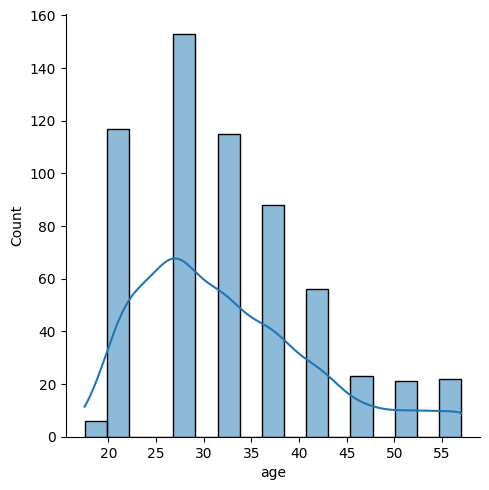

In [22]:
sns.displot(affairs['age'], kde=True)


The chart above calculates a kernel density as well. To get a real histogram, we have to disable the kde feature. We can also increase the number of buckets for our histogram by setting bins to a higher number.



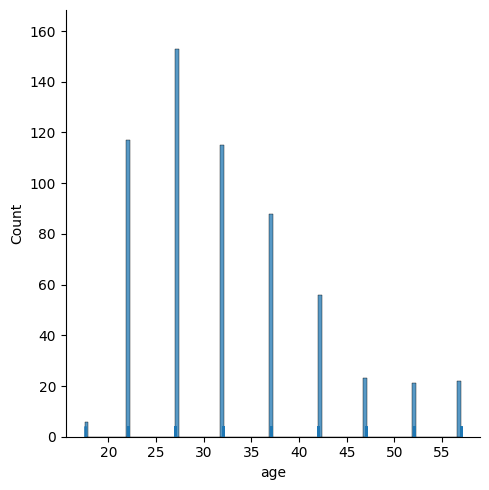

In [23]:
sns.displot(x=affairs['age'], bins=100, rug=True, kde=False)


Interesting! The ages of the people in this dataset seem to end with two or seven.

We can do the same for every numerical column, e.g. the years of marriage.

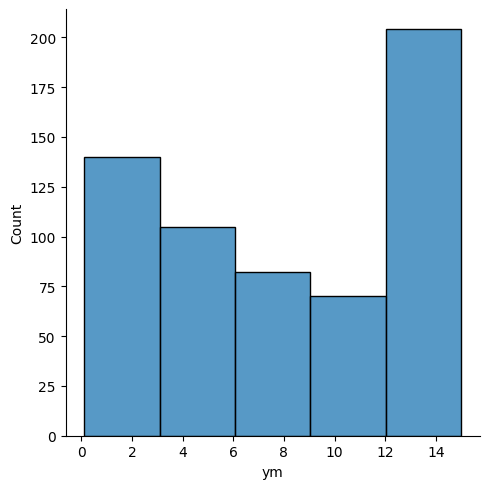

In [24]:
sns.displot(affairs['ym'], bins=5, kde=False)


The average age of our people is around 32, but the most people are married for more than 14 years!

